# SHAP Values

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH='/data/workspace_files/iqvia_data/clean/model_input.csv'
input_columns = ["quarter","duration","rectype","pos","pat_age","der_sex"
        ,"age_group","bill_spec","formulary", "is_in_patient", "count_of_diag", "count_of_icdprc","target"]

In [3]:
d_train = pd.read_csv(DATA_PATH,delimiter="|", usecols=input_columns)

In [4]:
d_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
quarter,1387172.0,NaN,NaN,NaN,2.522127,1.126683,1.0,2.0,3.0,4.0,4.0
is_in_patient,1387172.0,NaN,NaN,NaN,0.009439,0.096697,0.0,0.0,0.0,0.0,1.0
duration,1387172,5,<7,1383590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rectype,1387172,6,A,573772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_of_diag,1387172.0,NaN,NaN,NaN,1.656169,1.736013,0.0,0.0,1.0,3.0,12.0
count_of_icdprc,1387172.0,NaN,NaN,NaN,0.005688,0.138677,0.0,0.0,0.0,0.0,11.0
bill_spec,1387172,64,-,450400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,1387172,75,11,305675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
der_sex,1387172,3,F,858543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pat_age,1387172.0,NaN,NaN,NaN,86.610611,295.769968,-1.0,26.0,46.0,59.0,2017.0


In [5]:
# categorical data
cat_cols=np.array(d_train.columns[d_train.dtypes == object])

for feature in cat_cols:
    d_train[feature].fillna(d_train[feature].mode()[0], inplace=True)

# categorical data
num_cols=np.array(d_train.columns[d_train.dtypes != object])
for feature in num_cols:
    d_train = d_train.fillna(0)

    
d_train = d_train.fillna("Other")

In [6]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387172 entries, 0 to 1387171
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   quarter          1387172 non-null  int64  
 1   is_in_patient    1387172 non-null  float64
 2   duration         1387172 non-null  object 
 3   rectype          1387172 non-null  object 
 4   count_of_diag    1387172 non-null  int64  
 5   count_of_icdprc  1387172 non-null  int64  
 6   bill_spec        1387172 non-null  object 
 7   pos              1387172 non-null  object 
 8   der_sex          1387172 non-null  object 
 9   pat_age          1387172 non-null  float64
 10  age_group        1387172 non-null  object 
 11  formulary        1387172 non-null  object 
 12  target           1387172 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 137.6+ MB


In [7]:
d_train["quarter"] = d_train["quarter"].astype("str")
df_train = pd.get_dummies(d_train)

In [8]:
df_train.isnull().sum()

is_in_patient      0
count_of_diag      0
count_of_icdprc    0
pat_age            0
target             0
                  ..
formulary_-        0
formulary_F        0
formulary_N        0
formulary_U        0
formulary_Y        0
Length: 177, dtype: int64

In [9]:

from sklearn.preprocessing import RobustScaler
#  Need to determine the scaler
#scaler = MinMaxScaler(feature_range=(0, 1))

scaler = RobustScaler()
df_train['target'] = scaler.fit_transform(df_train['target'].values.reshape(-1,1))
df_train['pat_age'] = scaler.fit_transform(df_train['pat_age'].values.reshape(-1,1))
df_train['count_of_diag'] = scaler.fit_transform(df_train['count_of_diag'].values.reshape(-1,1))
df_train['count_of_icdprc'] = scaler.fit_transform(df_train['count_of_icdprc'].values.reshape(-1,1))

In [10]:
import torch
y=torch.tensor(df_train['target'].values,dtype=torch.float).reshape(-1,1)

In [11]:
batch_size=135000
test_size=int(batch_size*0.15)
train=df_train[:batch_size-test_size]
test=df_train[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [12]:
X = train.drop(columns=['target']).values
y = train["target"]
Z = test.values

In [13]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.00001, random_state = 12)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [15]:
def Errors(model, X_train, y_train, X_test, y_test):
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    MSE = mean_squared_error(y_test, y_pred)
    return ATrS, ATeS, RMSE, MSE

In [16]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Training set','Accuracy on Testing set', 'Mean square error'])

In [17]:

name = "Ridge"
model = Ridge(alpha=1.0)
model.fit(X_train1,y_train1)
y_pred = model.predict(X_test1)
ATrS, ATeS, RMSE, MSE = Errors(model, X_train1, y_train1, X_test1, y_test1)
Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Training set':ATrS,'Accuracy on Testing set':ATeS, 'Mean square error':MSE}),ignore_index=True )

In [18]:
Acc

,model,Root Mean Squared Error,Accuracy on Training set,Accuracy on Testing set,Mean square error
0,Ridge,15.188404,0.120162,0.091075,230.687625


In [19]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
shap.initjs()

In [31]:
# explain all the predictions in the test set
shap.initjs()
explainer = shap.LinearExplainer(model, X_train1,nsamples=1000, feature_perturbation="correlation_dependent")
shap_values = explainer.shap_values(X_test1)
X_test_array = X_test1 # we need to pass a dense version for the plotting functions

In [21]:
col = df_train.columns
col

Index(['is_in_patient', 'count_of_diag', 'count_of_icdprc', 'pat_age',
       'target', 'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4',
       'duration_16-30',
       ...
       'age_group_41-50', 'age_group_51-60', 'age_group_61-70',
       'age_group_71-80', 'age_group_81 >', 'formulary_-', 'formulary_F',
       'formulary_N', 'formulary_U', 'formulary_Y'],
      dtype='object', length=177)

In [20]:
shap.plots.bar(shap_values)

NameError: NameError: name 'shap_values' is not defined

In [21]:
shap.summary_plot(shap_values, X_test_array, feature_names=df_train.columns, max_display=50,)

NameError: NameError: name 'shap_values' is not defined

In [22]:
cols = df_train.columns

In [23]:
cols = cols[:176]
cols

Index(['is_in_patient', 'count_of_diag', 'count_of_icdprc', 'pat_age',
       'target', 'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4',
       'duration_16-30',
       ...
       'age_group_31-40', 'age_group_41-50', 'age_group_51-60',
       'age_group_61-70', 'age_group_71-80', 'age_group_81 >', 'formulary_-',
       'formulary_F', 'formulary_N', 'formulary_U'],
      dtype='object', length=176)

In [24]:
shap.initjs()
ind = 1
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=cols, contribution_threshold=0.05
)

NameError: NameError: name 'explainer' is not defined

In [30]:
shap.initjs()
ind = 23456
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=cols, contribution_threshold=0.05
)

Visualization omitted, Javascript library not loaded! 
 Have you run `initjs()` in this notebook? If this notebook was from another
 user you must also trust this notebook (File -> Trust notebook). If you are viewing
 this notebook on github the Javascript has been stripped for security. If you are using
 JupyterLab this error is because a JupyterLab extension has not yet been written.

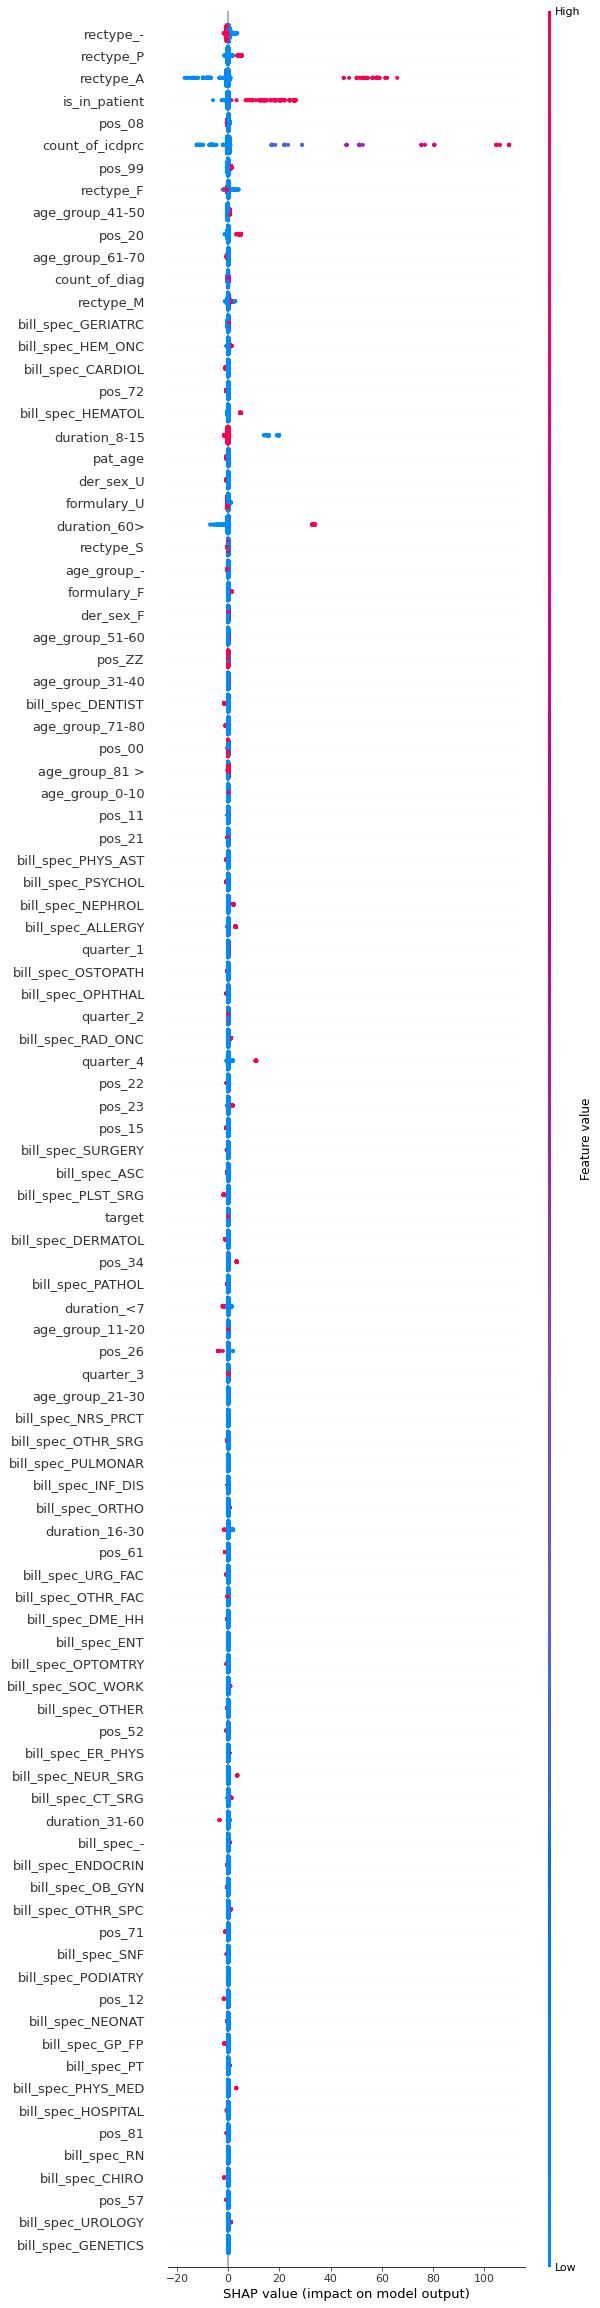

In [27]:
shap.summary_plot(shap_values, X_test_array,feature_names=df_train.columns,sort=True, max_display=100)

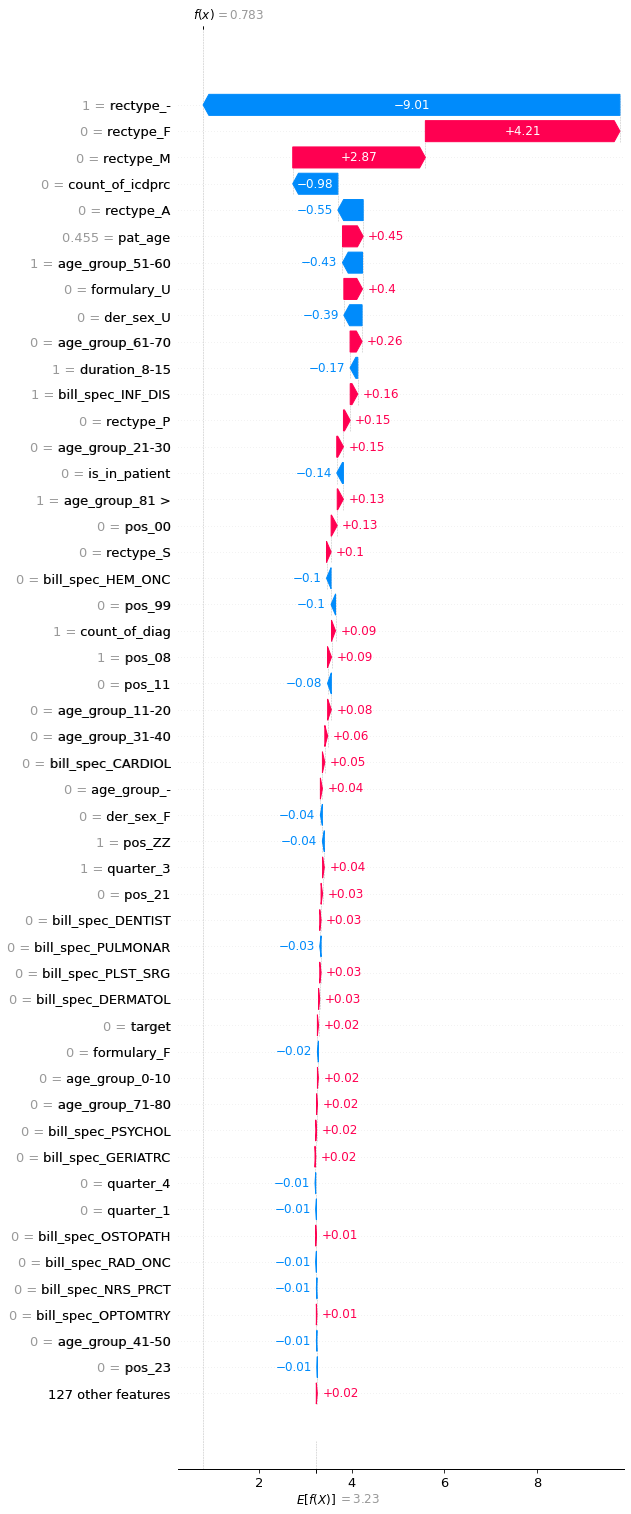

In [28]:
wf_explainer = shap.Explainer(model, X_test1, algorithm="linear", feature_names=df_train.columns)
wf_shap_values = wf_explainer(X_test1)

shap.plots.waterfall(wf_shap_values[0], max_display=50)